# Evaluation

## Scalability with data size

Tested on a 20-dimensional data set containing 5 clusters i 5 different subspaces. 10% of the data was added as noise records.

SUBCLU stopped to work after 200,000 points. CLIQUE stopped to work after 7mio points.

### Settings

CLIQUE:
- xsi: 25
- tau: 0.08

SUBCLU:
- epsilon 0.02
- minpts: 250 (for 10k points). Doubled for each step, so 500 minpts for 20k, 1000 minpts for 40k, etc.

MAFIA:
-a 1.4
-b 0.35
-M 20
-n 1000
-V
--timing

### Plot

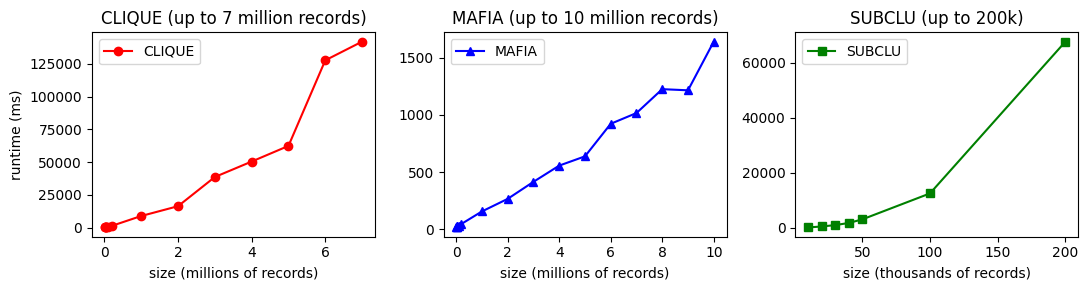

In [51]:
import matplotlib.pyplot as plt

# Data
size =   [10000, 20000, 30000, 40000, 50000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 15000000]
clique = [62   , 119  , 155  , 203  , 235  , 533   , 1255  , 8795   , 16290  , 38581  , 50392  , 62348  , 127730 , 142005]
mafia =  [15   , 25   , 17   , 22   , 27   , 31    , 45    , 155    , 265    , 414    , 556    , 637    , 922    , 1016   , 1225   , 1215   , 1641]
subclu = [137  , 477  , 984  , 1751 , 3055 , 12490 , 67603]

# 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(11, 3))

# First plot: CLIQUE (size in millions)
axs[0].plot([s / 1_000_000 for s in size[:len(clique)]], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('size (millions of records)')
axs[0].set_ylabel('runtime (ms)')
axs[0].set_title('CLIQUE (up to 7 million records)')
axs[0].legend()

# Second Plot: MAFIA (size in millions)
axs[1].plot([s / 1_000_000 for s in size[:len(mafia)]], mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('size (millions of records)')
axs[1].set_title('MAFIA (up to 10 million records)')
axs[1].legend()

# Third plot: SUBCLU (size in thousands)
axs[2].plot([s / 1000 for s in size[:len(subclu)]], subclu, 'gs-', label='SUBCLU')
axs[2].set_xlabel('size (thousands of records)')
axs[2].set_title('SUBCLU (up to 200k)')
axs[2].legend()

# Show plots
plt.tight_layout()
plt.show()

## Accuracy

Tested on a 10-dimensional data set containing 100,000 points for testing CLIQUE and MAFIA, however, SUBCLU was not able to handle this amount of data, so it was tested on a similar distribution of points with 20,000 points. 10% of the data was added as noise records.

The first case, has two clusters embedded in a different 4 dimensional subspace. Second case, has 4 clusters embedded in a different 4 dimensional subspace.

MAFIA reports the correct clusters in both cases with proper use of parameters. However, CLIQUE reports...

### 2 clusters

#### Settings

SUBCLU:
- epsilon: 0.05
- minpts: 850

CLIQUE:
- xsi: 20
- tau: 0.41
- prune: false

MAFIA:
-a 3
-b 0.6
-M 20
-n 1000
-V
-p
--timing

#### Plot

CLIQUE:

<img src="data-generator\datasets\mdcgen\accuracy\2clusters\100k\clique\3d_plot.png" alt="drawing" width="400"/>

MAFIA:

<img src="data-generator\datasets\mdcgen\accuracy\2clusters\100k\mafia\3d_plot.png" alt="drawing" width="400"/>

SUBCLU:

<img src="data-generator\datasets\mdcgen\accuracy\2clusters\20k\subclu\3d_plot.png" alt="drawing" width="400"/>

### 4 clusters

#### Settings

SUBCLU:
- epsilon: 0.02
- minpts: 500

CLIQUE:
- xsi: 35
- tau: 0.2

MAFIA:
-a 3
-b 0.6
-M 100
-n 1000
-V
-p
--timing

#### Plot

CLIQUE:

<img src="data-generator\datasets\mdcgen\accuracy\4clusters\100k\clique\3d_plot.png" alt="drawing" width="400"/>

MAFIA:

<img src="data-generator\datasets\mdcgen\accuracy\4clusters\100k\mafia\3d_plot.png" alt="drawing" width="400"/>

SUBCLU:

<img src="data-generator\datasets\mdcgen\accuracy\4clusters\20k\subclu\3d_plot.png" alt="drawing" width="400"/>

### Plus shape

#### Settings
CLIQUE:
- xsi: 10
- tau: 0.2

#### Plot
CLIQUE:

<img src="data-generator\datasets\home-made\accuracy\plus_shape\clique\plot.png" alt="drawing" width="400"/>

MAFIA:

<img src="data-generator\datasets\home-made\accuracy\plus_shape\mafia\plot.png" alt="drawing" width="400"/>

### Bezier curve

SUBCLU:
- epsilon: 0.005
- minpts: 20

CLIQUE:
- xsi: 20
- tau: 0.06

#### Plot
CLIQUE:

<img src="data-generator\datasets\artificalCluster\accuracy\bezier\clique\plot.png" alt="drawing" width="400"/>

SUBCLU:

<img src="data-generator\datasets\artificalCluster\accuracy\bezier\subclu\plot.png" alt="drawing" width="400"/>

## CDUs

## Cluster dimensionality

### Settings

CLIQUE:
- xsi: 30
- tau: 0.25

MAFIA:
-a 2.2
-b 0.35
-M 40
-n 1000
-p
-V
--timing

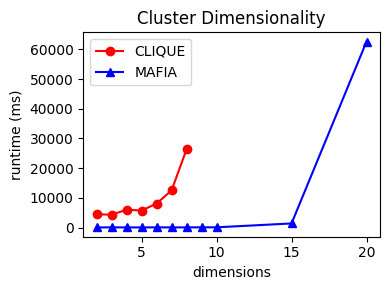

In [46]:
import matplotlib.pyplot as plt

# Data
dims =   [2   , 3   , 4   , 5   , 6   , 7    , 8    , 9 , 10, 15 , 20]
mafia =  [45  , 63  , 55  , 45  , 63  , 55   , 60   , 79, 86, 1387, 62607]
clique = [4440, 4347, 6017, 5740, 8093, 12532, 26373]

# Figure size
plt.figure(figsize=(3, 3))

# Plot both in the same graph
plt.plot(dims[:len(clique)], clique, 'ro-', label='CLIQUE')
plt.plot(dims, mafia, 'b^-', label='MAFIA')

# Add labels and title
plt.xlabel('dimensions')
plt.ylabel('runtime (ms)')
plt.title('Cluster Dimensionality')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Data dimensionality

MAFIA and CLIQUE was on a 100 k dataset.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.3
- prune: false

MAFIA:
-a 2.2
-b 0.35
-M 40
-n 1000
-p
-V
--timing

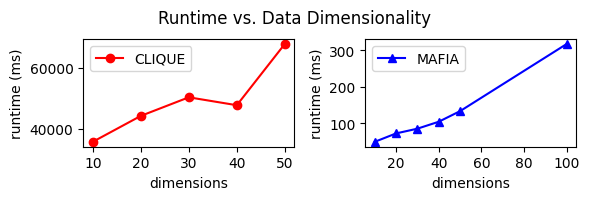

In [41]:
import matplotlib.pyplot as plt

# Data
dims =   [10   , 20   , 30   , 40   , 50 , 100]
mafia_runtime =  [49   , 72   , 85   , 104  , 133, 317]
clique_runtime = [35688, 44180, 50275, 47682, 67772]

# CLIQUE:
# 10d = 66 clusters found
# 20d = 84
# 30d = 93
# 40d = 77
# 50d = 93
# 100d, not able to run.

# MAFIA:
# 10d  = 3 clusters found
# 20d  = 4 clusters found
# 30d  = 3 clusters found
# 40d  = 4 clusters found
# 50d  = 3 clusters found
# 100d = 4 clusters found

# Create subplots for runtime (CLIQUE and MAFIA)
fig, axs = plt.subplots(1, 2, figsize=(6, 2))

# First Plot: CLIQUE runtime
axs[0].plot(dims[:len(clique_runtime)], clique_runtime, 'ro-', label='CLIQUE')
axs[0].set_xlabel('dimensions')
axs[0].set_ylabel('runtime (ms)')
axs[0].legend()

# Second Plot: MAFIA runtime
axs[1].plot(dims, mafia_runtime, 'b^-', label='MAFIA')
axs[1].set_xlabel('dimensions')
axs[1].set_ylabel('runtime (ms)')
axs[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle('Runtime vs. Data Dimensionality')
plt.tight_layout(rect=[0, 0, 1, 1.07])  # leave space for the suptitle

# Show plot
plt.show()

## Sensitivity
As observed in article. Alpha and beta controls the number of clusters and their quality.


- 1,000,000 data points
- 20 dims
- 5 clusters
- 10% outliers
- noiseMatrix:
1
3
5
7
8

### Alpha-variation
-b 0.35
-M 40
-n 1000

-a 0.8 -> 5.2 (step size: 0.4)

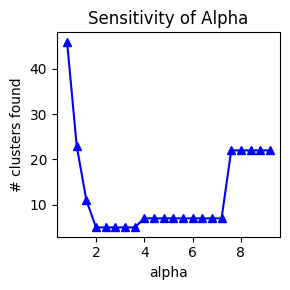

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha = np.arange(0.8, 9.6, 0.4)
clusters_found = [46, 23, 11, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 22, 22, 22, 22, 22]

# Figure size
plt.figure(figsize=(3, 3))

# Plot
plt.plot(alpha, clusters_found, 'b^-')

# Add labels and title
plt.xlabel('alpha')
plt.ylabel('# clusters found')
plt.title('Sensitivity of Alpha')

# Show plot
plt.tight_layout()
plt.show()